### About Dataset
The purposes of this exercise to look into different features to observe their relationship, and plot a linear regression models based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.
### Context
The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value designated for each level.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Dataset link - https://www.kaggle.com/datasets/mirichoi0218/insurance

In [2]:
#loading dataset
df= pd.read_csv("insurance.csv")

In [3]:
#Reading dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Column info

#Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [4]:
#Dimensionality
df.shape

(1338, 7)

In [5]:
#Checking duplicates
df.duplicated().sum()

1

In [6]:
#checking missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#data types
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
#descriptive stats
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# categorical columns
df[["sex","smoker","region"]].head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [10]:
print("Uniques in sex column:",df["sex"].unique())
print("Uniques in smoker column:",df["smoker"].unique())
print("Uniques in region column:",df["region"].unique())

Uniques in sex column: ['female' 'male']
Uniques in smoker column: ['yes' 'no']
Uniques in region column: ['southwest' 'southeast' 'northwest' 'northeast']


# Data Analysis

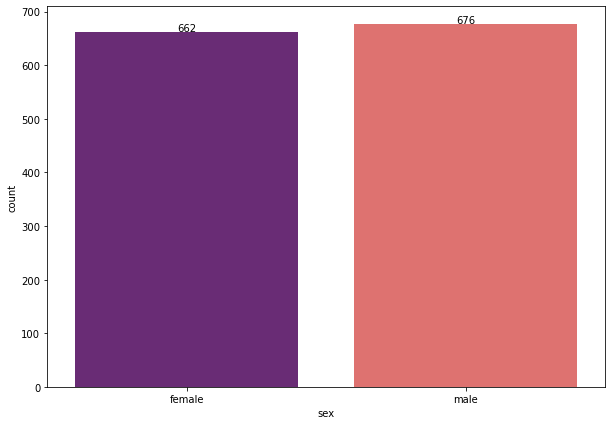

In [11]:
#Number of male and female
plt.figure(figsize=(10,7))
fig=sns.countplot(x=df["sex"], palette="magma")

#for showing value count above the bars
for p in fig.patches:
    fig.annotate(format(p.get_height(),".0f"),(p.get_x()+p.get_width()/2.,p.get_height()),
                 ha="center", va="center",xytext=(0,4), textcoords="offset points")

- The number of male and female in the dataset are almost same.

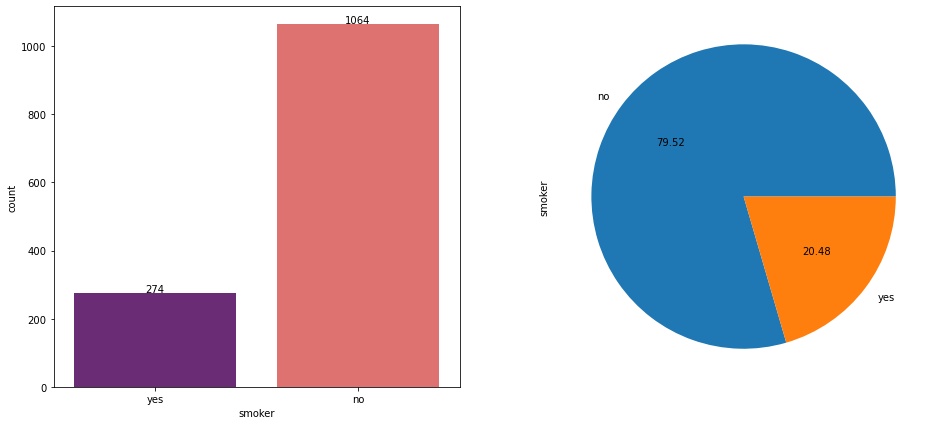

In [12]:
#Plotting for smokers and non smokers
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
fig=sns.countplot(x=df["smoker"], palette="magma")

#for showing value count above the bars
for p in fig.patches:
    fig.annotate(format(p.get_height(),".0f"),(p.get_x()+p.get_width()/2.,p.get_height()),
                 ha="center", va="center",xytext=(0,4), textcoords="offset points")
plt.subplot(1,2,2)
df["smoker"].value_counts().plot.pie(autopct="%.2f")
plt.show()
    

- Only 20.49% are smokers in the dataset.

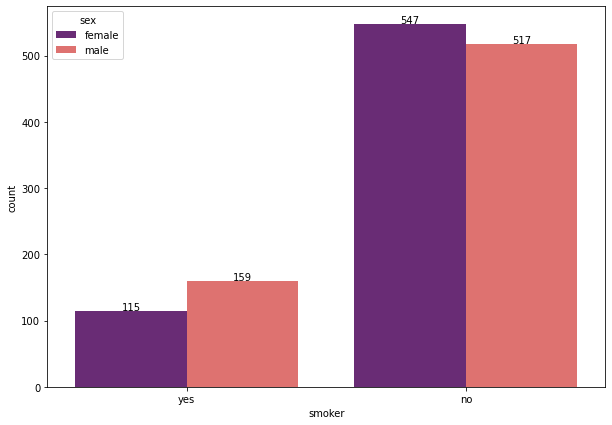

In [13]:
#Smokers and non smokers in male and female
plt.figure(figsize=(10,7))
fig=sns.countplot(x=df["smoker"],hue=df["sex"], palette="magma")

#for showing value count above the bars
for p in fig.patches:
    fig.annotate(format(p.get_height(),".0f"),(p.get_x()+p.get_width()/2.,p.get_height()),
                 ha="center", va="center",xytext=(0,4), textcoords="offset points")
    

- Female which are smoking is less in the dataset compared to the males.

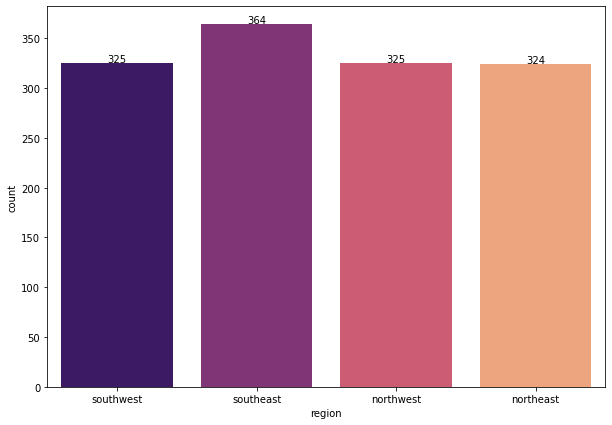

In [14]:
#plotting for region column
plt.figure(figsize=(10,7))
fig=sns.countplot(x=df["region"], palette="magma")

#for showing value count above the bars
for p in fig.patches:
    fig.annotate(format(p.get_height(),".0f"),(p.get_x()+p.get_width()/2.,p.get_height()),
                 ha="center", va="center",xytext=(0,4), textcoords="offset points")

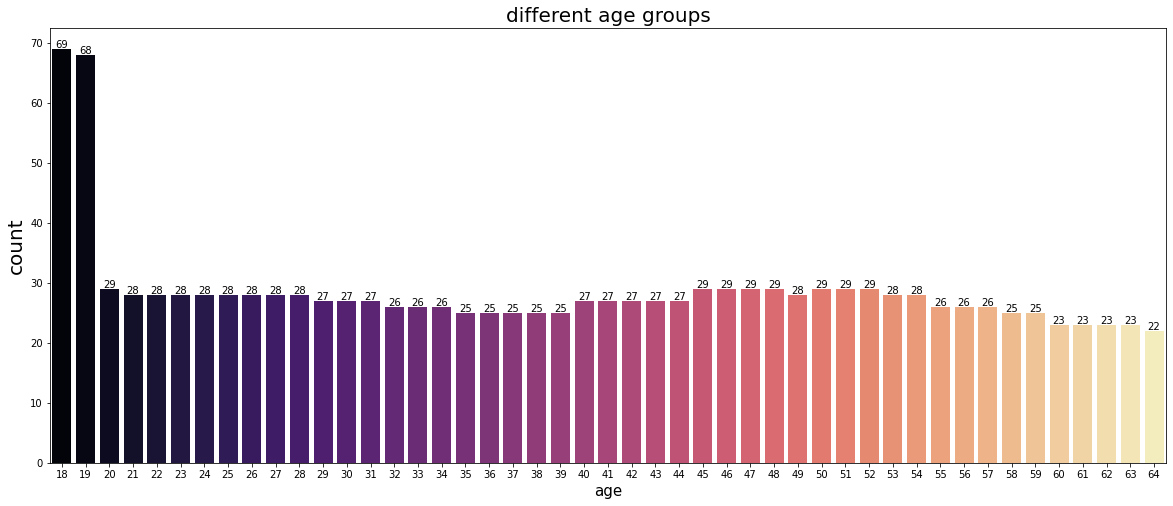

In [15]:
#Plotting for differt age groups
plt.figure(figsize = (20,8))
fig=sns.countplot(x="age",data=df,palette='magma')
plt.title("different age groups", fontsize=20)
plt.xlabel("age", fontsize=15)
plt.ylabel("count", fontsize=20)

#for showing value count above the bars
for p in fig.patches:
    fig.annotate(format(p.get_height(),".0f"),(p.get_x()+p.get_width()/2.,p.get_height()),
                 ha="center", va="center",xytext=(0,4), textcoords="offset points")
plt.show()
    
#df["age"].value_counts()

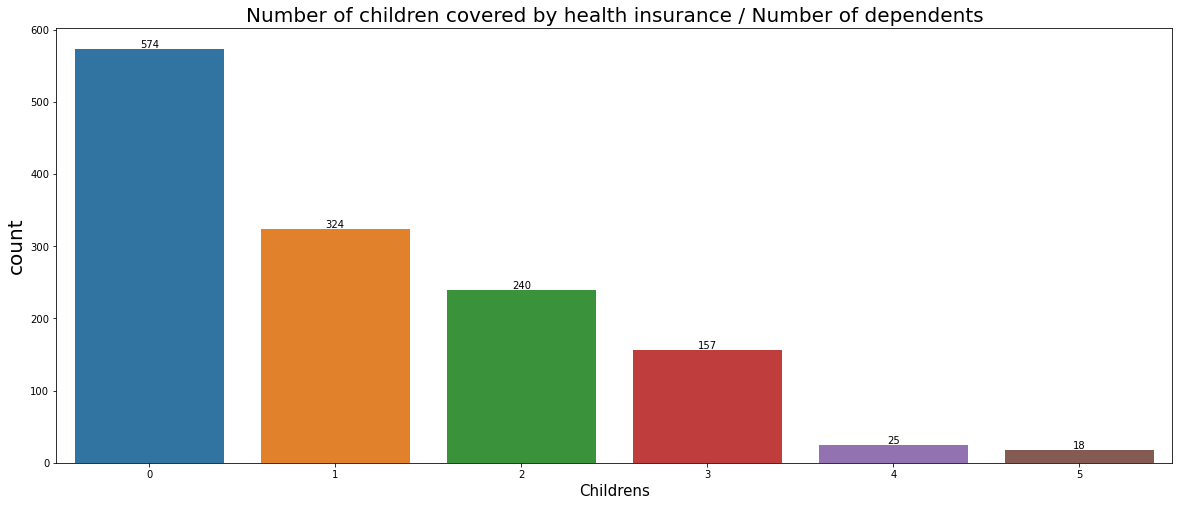

In [16]:
#plotting for number of childrens
plt.figure(figsize = (20,8))
fig=sns.countplot(x="children",data=df,palette='tab10')
plt.title("Number of children covered by health insurance / Number of dependents", fontsize=20)
plt.xlabel("Childrens", fontsize=15)
plt.ylabel("count", fontsize=20)

#for showing value count above the bars
for p in fig.patches:
    fig.annotate(format(p.get_height(),".0f"),(p.get_x()+p.get_width()/2.,p.get_height()),
                 ha="center", va="center",xytext=(0,4), textcoords="offset points")
plt.show()

- Most of the people in the dataset doesn’t have children.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

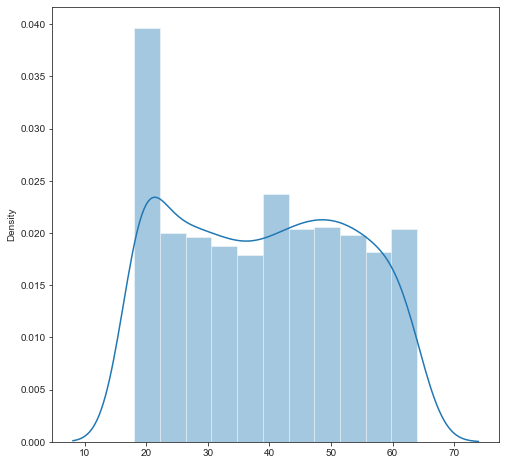

In [17]:
# Distribution of age
plt.figure(figsize = (8,8))
sns.set_style("ticks")
sns.distplot(x=df["age"])

- The age distribution is almost normal but in range 18-23 have more peoples.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

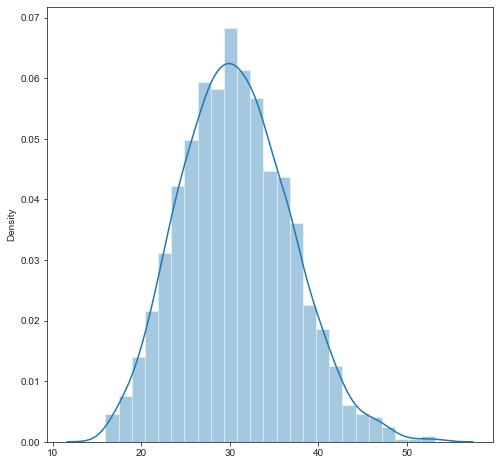

In [18]:
#Distibution of bmi column
plt.figure(figsize = (8,8))
sns.distplot(x=df["bmi"])

- The "bmi" data is normally distributed. 

                                                          BMI Range                

| BMI           | Weight Status |
|:-------------:|:-------------:|
| Below 18.5    |	Underweight |
|:-------------:|:-------------:|
| 18.5—24.9	    | Healthy       |
|:-------------:|:-------------:|
| 25.0—29.9	    | Overweight    |
|:-------------:|:-------------:|
| 30.0 and Above|	Obese       |
|:-------------:|:-------------:|

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

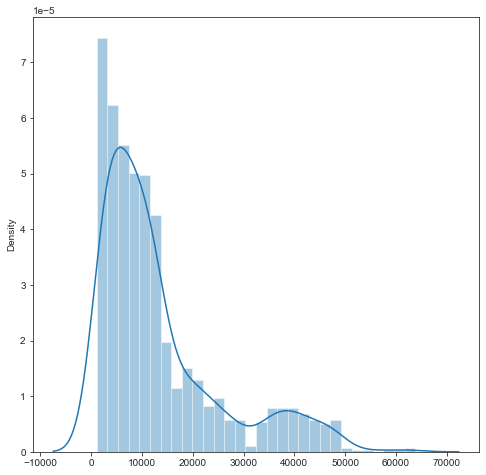

In [19]:
#Distribution of expenses
plt.figure(figsize = (8,8))
sns.distplot(x=df["charges"])

- The charges from 1000 to 15000 is higher and the highest expenses is 70000.

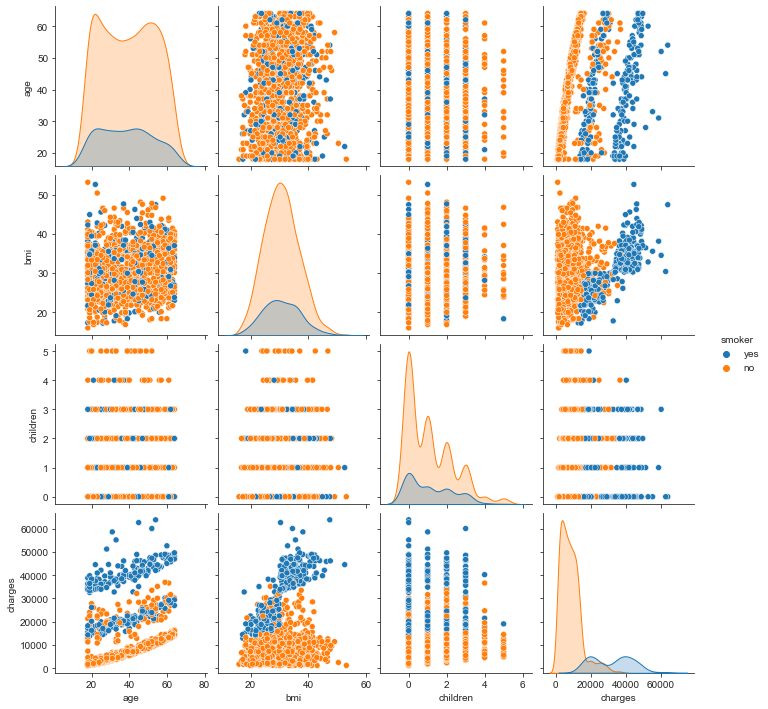

In [20]:
#pairplot based on "smoker"
sns.pairplot(data=df,hue='smoker')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

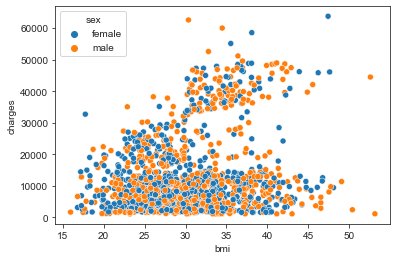

In [21]:
sns.scatterplot(x=df["bmi"],y=df["charges"],hue=df["sex"])

- As bmi increase the charges also increasing.

<AxesSubplot:>

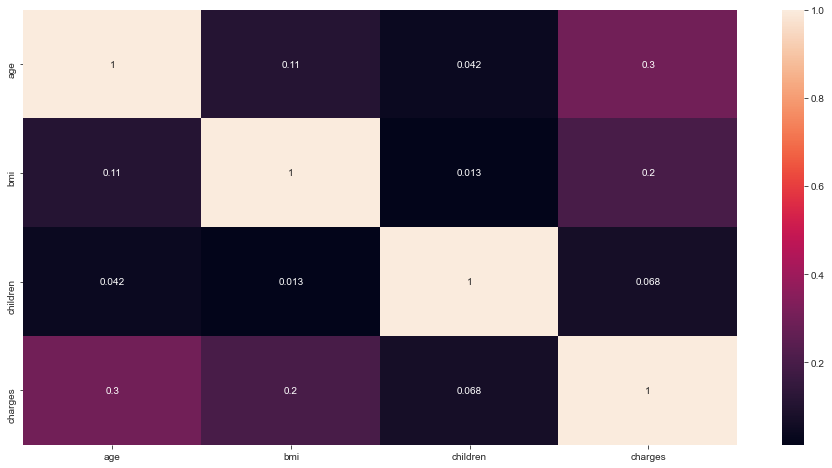

In [22]:
#Correlation heatmap
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot = True)

- the age and bmi have high correlation with charges.

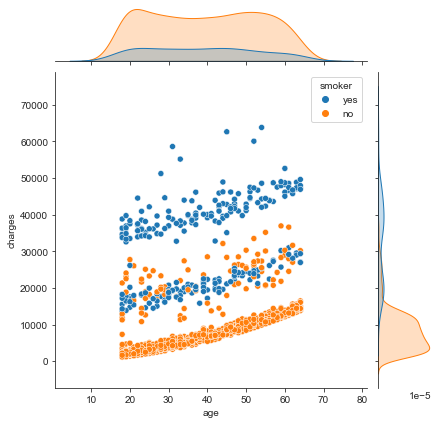

In [23]:
# relation betweeen 'charges' and 'age' 
sns.jointplot(x=df['age'],y=df['charges'], hue="smoker", data=df)

- With increase in age the charges also increase.

- The smoker has more insurance premium charges.

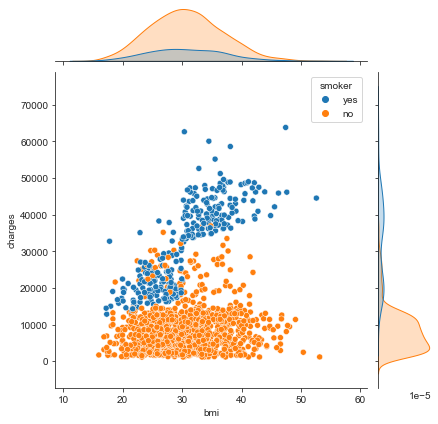

In [24]:
# relation betweeen 'charges' and 'bmi' 
sns.jointplot(x=df['bmi'],y=df['charges'], hue="smoker", data=df)

A higher BMI means that you are more susceptible to coronary heart diseases and other illnesses like diabetes and other weight-related diseases.

Insurance companies use BMI to determine what your premium amount should be.

# Encoding the categorical features

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
print("Uniques in sex column:",df["sex"].unique())
print("Uniques in smoker column:",df["smoker"].unique())
print("Uniques in region column:",df["region"].unique())

Uniques in sex column: ['female' 'male']
Uniques in smoker column: ['yes' 'no']
Uniques in region column: ['southwest' 'southeast' 'northwest' 'northeast']


In [27]:

df['sex'] = df["sex"].map({"female":0,"male":1})
df['smoker'] = df["smoker"].map({"yes":0,"no":1})
df['region'] = df["region"].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [28]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

# Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model. Taking training data 80% and 20% for model testing.

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X=df.drop("charges",axis=1)
y=df["charges"]

In [31]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,0
1,18,1,33.770,1,1,1
2,28,1,33.000,3,1,1
3,33,1,22.705,0,1,2
4,32,1,28.880,0,1,2
...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2
1334,18,0,31.920,0,1,3
1335,18,0,36.850,0,1,1
1336,21,0,25.800,0,1,0


In [32]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [33]:
print(X.shape)
print(y.shape)

(1338, 6)
(1338,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# Logistic Regression Model

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()

In [37]:
lm.fit(X_train,y_train)

LinearRegression()

In [38]:
predictions1 = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

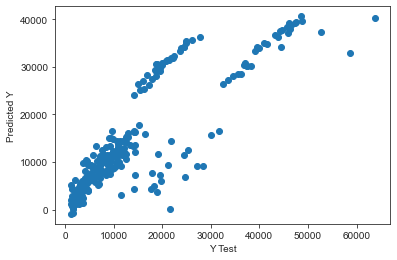

In [39]:
plt.scatter(y_test,predictions1)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [40]:
from sklearn import metrics

In [41]:
#prediction on training data
training_data_predictions=lm.predict(X_train)

In [42]:
r2_train_lr = metrics.r2_score(y_train, training_data_predictions)
print("R square value for training data:", r2_train_lr)

R square value for training data: 0.7512325193618925


In [43]:
#prediction on testing data
testing_data_predictions=lm.predict(X_test)

In [44]:
r2_test_lr = metrics.r2_score(y_test, testing_data_predictions)
print("R square value for testing data:", r2_test_lr)

R square value for testing data: 0.7455822176310462


In [45]:
MAE_lr =metrics.mean_absolute_error(y_test, predictions1)
print('MAE:',MAE_lr )
MSE_lr= metrics.mean_squared_error(y_test, predictions1)
print('MSE:',MSE_lr)
RMSE_lr=np.sqrt(metrics.mean_squared_error(y_test, predictions1))
print('RMSE:',RMSE_lr )

MAE: 4490.665574849616
MSE: 41527100.38511964
RMSE: 6444.152417899474


# Decision Tree Model

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
dtree = DecisionTreeRegressor()

In [48]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [49]:
predictions2 = dtree.predict(X_test)

Text(0, 0.5, 'Predicted Y')

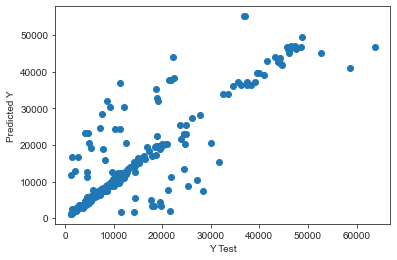

In [50]:
plt.scatter(y_test,predictions2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [51]:
#prediction on training data
training_data_predictions=dtree.predict(X_train)

In [52]:
r2_train_dtree = metrics.r2_score(y_train, training_data_predictions)
print("R square value for training data:", r2_train_dtree)

R square value for training data: 0.9987960748149602


In [53]:
#prediction on testing data
testing_data_predictions=dtree.predict(X_test)

In [54]:
r2_test_dtree = metrics.r2_score(y_test, testing_data_predictions)
print("R square value for testing data:", r2_test_dtree)

R square value for testing data: 0.7214230629735279


In [55]:
MAE_dtree =metrics.mean_absolute_error(y_test, predictions2)
print('MAE:',MAE_dtree )
MSE_dtree= metrics.mean_squared_error(y_test, predictions2)
print('MSE:',MSE_dtree)
RMSE_dtree=np.sqrt(metrics.mean_squared_error(y_test, predictions2))
print('RMSE:',RMSE_dtree )

MAE: 3260.589455727612
MSE: 45470455.410624415
RMSE: 6743.178435324429


# Random Forest model

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
rfc = RandomForestRegressor()

In [58]:
rfc.fit(X_train,y_train)

RandomForestRegressor()

In [59]:
predictions3 = rfc.predict(X_test)

Text(0, 0.5, 'Predicted Y')

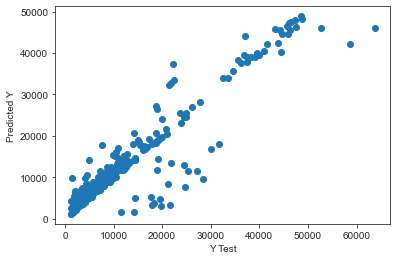

In [60]:
plt.scatter(y_test,predictions3)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [61]:
#prediction on training data
training_data_predictions=rfc.predict(X_train)

In [62]:
r2_train_rfc = metrics.r2_score(y_train, training_data_predictions)
print("R square value for training data:", r2_train_rfc)

R square value for training data: 0.9747661560265799


In [63]:
#prediction on testing data
testing_data_predictions= rfc.predict(X_test)

In [64]:
r2_test_rfc = metrics.r2_score(y_test, testing_data_predictions)
print("R square value for testing data:", r2_test_rfc)

R square value for testing data: 0.8606438315809444


In [65]:
MAE_rfc =metrics.mean_absolute_error(y_test, predictions3)
print('MAE:',MAE_rfc )
MSE_rfc= metrics.mean_squared_error(y_test, predictions3)
print('MSE:',MSE_rfc)
RMSE_rfc=np.sqrt(metrics.mean_squared_error(y_test, predictions3))
print('RMSE:',RMSE_rfc )

MAE: 2612.361441374534
MSE: 22746277.958006233
RMSE: 4769.305815106244


# GradientBossting Regression

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

In [67]:
gr=GradientBoostingRegressor()

In [68]:
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [69]:
predictions4=gr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

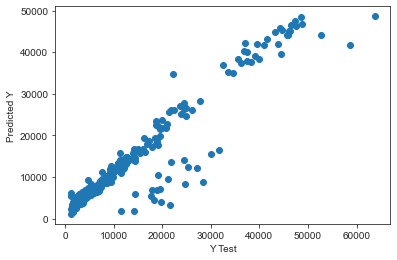

In [70]:
plt.scatter(y_test,predictions4)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [71]:
#prediction on training data
training_data_predictions=gr.predict(X_train)

In [72]:
r2_train_gr = metrics.r2_score(y_train, training_data_predictions)
print("R square value for training data:", r2_train_gr)

R square value for training data: 0.8962969065228042


In [73]:
#prediction on testing data
testing_data_predictions= gr.predict(X_test)

In [74]:
r2_test_gr = metrics.r2_score(y_test, testing_data_predictions)
print("R square value for testing data:", r2_test_gr)

R square value for testing data: 0.8840626350396087


In [75]:
MAE_gr =metrics.mean_absolute_error(y_test, predictions4)
print('MAE:',MAE_gr )
MSE_gr= metrics.mean_squared_error(y_test, predictions4)
print('MSE:',MSE_gr)
RMSE_gr=np.sqrt(metrics.mean_squared_error(y_test, predictions4))
print('RMSE:',RMSE_gr )

MAE: 2496.1912201713335
MSE: 18923766.052305363
RMSE: 4350.145520819431


# Dataframe of prediction of models with actual value

In [76]:
prediction_models=pd.DataFrame({"Actual":y_test,"Linear Regression":predictions1, "DecisionTree":predictions2,
                               "RandomForest":predictions3,"GradientBoosting":predictions4})

In [77]:
prediction_models

,Actual,Linear Regression,DecisionTree,RandomForest,GradientBoosting
1001,34472.84100,28080.505665,36021.01120,35560.389212,35076.673818
979,4889.03680,6559.247402,5478.03680,5121.465141,5582.246955
96,12105.32000,12870.441964,11881.96960,15117.592935,13407.636551
1003,21232.18226,9274.088587,7789.63500,8398.131248,9505.115090
660,6435.62370,13415.497019,6356.27070,8831.084444,6716.670889
...,...,...,...,...,...
445,7345.08400,9525.621038,7348.14200,10490.887371,8266.037056
1306,16115.30450,27017.735991,16657.71745,16486.028149,16810.768808
158,36950.25670,30738.798066,55135.40209,44196.923157,42110.717649
523,5397.61670,9370.644747,19214.70553,7346.264789,5865.613103


From above dataframe we can see that gradientboosting model is very close to actual values in most of the cases.

In [78]:
# Dataframe of models for model performance using evaluation 

In [79]:
models=[("Linear Regression",MAE_lr,MSE_lr,RMSE_lr,r2_train_lr,r2_test_lr),
        ("Decision Tree Regressor",MAE_dtree,MSE_dtree,RMSE_dtree,r2_train_dtree,r2_test_dtree),
        ("Random Forest Regressor",MAE_rfc,MSE_rfc,RMSE_rfc,r2_train_rfc,r2_test_rfc),
       ("Gradient Boosting Regressor",MAE_gr,MSE_gr,RMSE_gr,r2_train_gr,r2_test_gr)]

In [80]:
results = pd.DataFrame(data = models, columns=['Model','MAE','MSE', 'RMSE', 'R2_Score(training)', 'R2_Score(test)'])
results

,Model,MAE,MSE,RMSE,R2_Score(training),R2_Score(test)
0,Linear Regression,4490.665575,4.152710e+07,6444.152418,0.751233,0.745582
1,Decision Tree Regressor,3260.589456,4.547046e+07,6743.178435,0.998796,0.721423
2,Random Forest Regressor,2612.361441,2.274628e+07,4769.305815,0.974766,0.860644
3,Gradient Boosting Regressor,2496.191220,1.892377e+07,4350.145521,0.896297,0.884063


### Selecting Gradient Boosting Regressor model for predictions because R2_score value for test and training are close, performed better and also Mean absolute error value is also less compared to other models.

# Comparing Performances of all model predictions with actual value

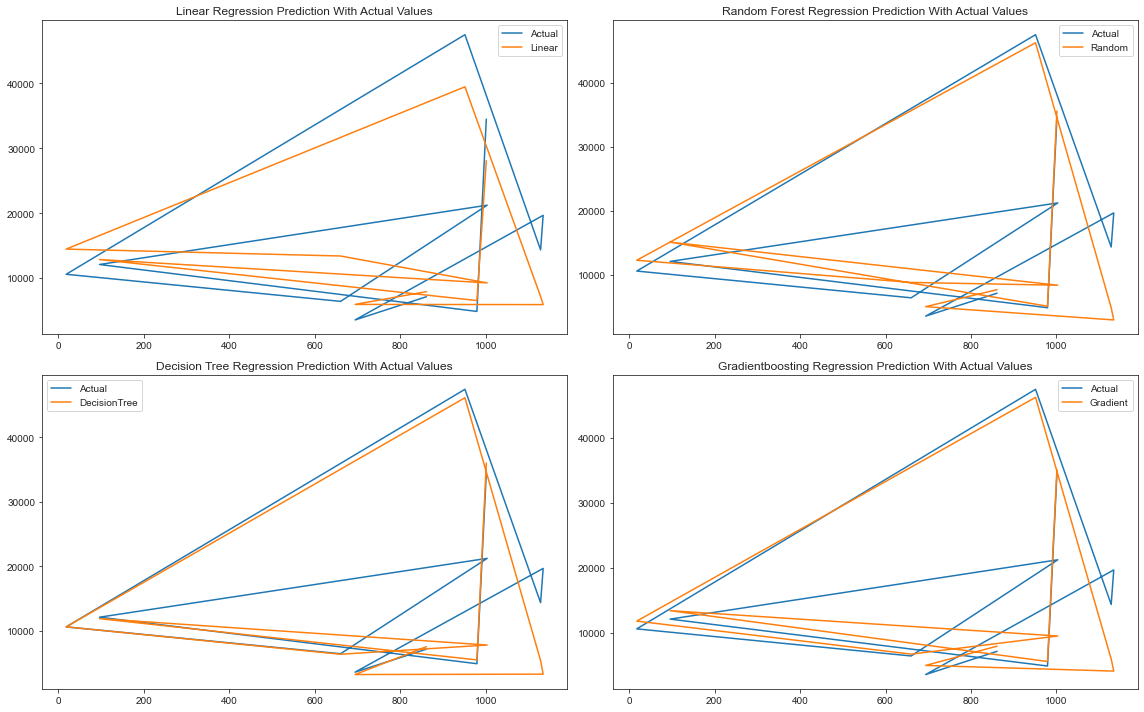

In [81]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.plot(prediction_models["Actual"].iloc[0:11],label="Actual") #iloc[0:11] for first 10 values
plt.plot(prediction_models["Linear Regression"].iloc[0:11],label="Linear")
plt.title("Linear Regression Prediction With Actual Values")
plt.legend()

plt.subplot(2,2,2)
plt.plot(prediction_models["Actual"].iloc[0:11],label="Actual")
plt.plot(prediction_models["RandomForest"].iloc[0:11],label="Random")
plt.title("Random Forest Regression Prediction With Actual Values")
plt.legend()

plt.subplot(2,2,3)
plt.plot(prediction_models["Actual"].iloc[0:11],label="Actual")
plt.plot(prediction_models["DecisionTree"].iloc[0:11],label="DecisionTree")
plt.title("Decision Tree Regression Prediction With Actual Values")
plt.legend()

plt.subplot(2,2,4)
plt.plot(prediction_models["Actual"].iloc[0:11],label="Actual")
plt.plot(prediction_models["GradientBoosting"].iloc[0:11],label="Gradient")
plt.title("Gradientboosting Regression Prediction With Actual Values")
plt.legend()

plt.tight_layout()

Gradientboosting regression prediction is close to actual values which is vissible from "Gradientboosting Regression Prediction With Actual Values" plot.

## Creating model for prediction which will take user input to find charges

In [82]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [83]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [84]:
def prediction():
    age=input("age:")
    print("For Female press 0 and for Male press 1")
    sex=input("sex:")
    bmi=input("bmi:")
    children=input("Number of children:")
    smoker=input("For smoker (yes) press 0 and for non smoker (no) press 1:")
    print("Press the number of your region in US from where you are'southwest'=0,'southeast'=1,'northwest'=2,'northeast'=3")
    region=input("region:")
    
    result=gr.predict([[age,sex,bmi,children,smoker,region]])
    print("The insurance cost is:", result[0]) 

In [85]:
#32	female	33.2	3	no	northwest	6128.8
prediction()

age:32
For Female press 0 and for Male press 1
sex:0
bmi:33.2
Number of children:3
For smoker (yes) press 0 and for non smoker (no) press 1:1
Press the number of your region in US from where you are'southwest'=0,'southeast'=1,'northwest'=2,'northeast'=3
region:2
The insurance cost is: 6602.794284713971


In [ ]:
prediction()
#63	male	41.5	0	no	southeast	13405.39

age:63
For Female press 0 and for Male press 1
sex:1
bmi:41.5
Number of children:0
For smoker (yes) press 0 and for non smoker (no) press 1:1
Press the number of your region in US from where you are'southwest'=0,'southeast'=1,'northwest'=2,'northeast'=3


In [111]:
#42	female	26.6	0	yes	northwest	21348.71
prediction()

age:42
For Female press 0 and for Male press 1
sex:0
bmi:26.6
Number of children:0
For smoker (yes) press 0 and for non smoker (no) press 1:0
Press the number of your region in US from where you are'southwest'=0,'southeast'=1,'northwest'=2,'northeast'=3
region:2
The insurance cost is: 25566.1903675629


In [112]:
#18	female	36.9	0	yes	southeast	36149.48
prediction()

age:18
For Female press 0 and for Male press 1
sex:0
bmi:36.9
Number of children:0
For smoker (yes) press 0 and for non smoker (no) press 1:0
Press the number of your region in US from where you are'southwest'=0,'southeast'=1,'northwest'=2,'northeast'=3
region:1
The insurance cost is: 36235.46087289437
